<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/2203A52097/blob/main/statml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
#load dataset
data=pd.read_csv('/content/zoo animal classification.csv')
print(data)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
170        carp     1         0     1     0         1        0         0   
171     catfish     1         0     0     1         0        0         1   
172        cavy     0         0     1     0         0        0         0   
173     cheetah     0         1     1     0         1        0         0   
174         cat     0         1     0     0         1        1         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

<ipython-input-68-e0783baf373e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


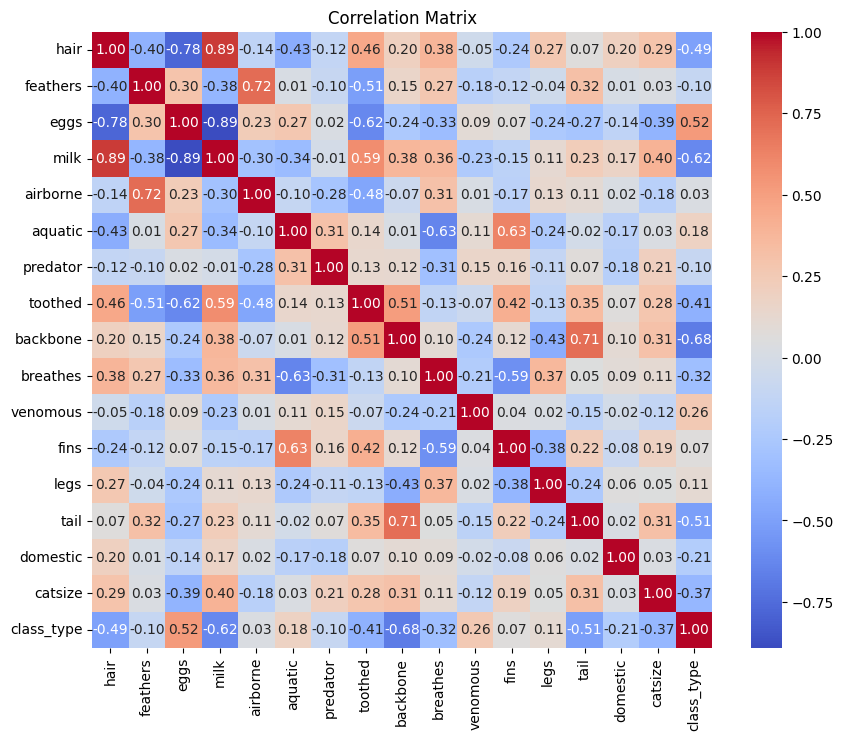

In [68]:

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [33]:
data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [34]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [35]:
data.isna()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
172,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
data.dropna(how='all')

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,carp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,4
171,catfish,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,7
172,cavy,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,4
173,cheetah,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,5


In [37]:
#preprocessing
dat=data.drop('animal_name',axis=1)

In [38]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        175 non-null    int64
 1   feathers    175 non-null    int64
 2   eggs        175 non-null    int64
 3   milk        175 non-null    int64
 4   airborne    175 non-null    int64
 5   aquatic     175 non-null    int64
 6   predator    175 non-null    int64
 7   toothed     175 non-null    int64
 8   backbone    175 non-null    int64
 9   breathes    175 non-null    int64
 10  venomous    175 non-null    int64
 11  fins        175 non-null    int64
 12  legs        175 non-null    int64
 13  tail        175 non-null    int64
 14  domestic    175 non-null    int64
 15  catsize     175 non-null    int64
 16  class_type  175 non-null    int64
dtypes: int64(17)
memory usage: 23.4 KB


In [39]:
#to confirm that dataset has no null values
dat.isna().sum()


hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [40]:
print('class distribution before SMOTE:',Counter(data['class_type']))

class distribution before SMOTE: Counter({1: 48, 2: 32, 4: 26, 7: 21, 6: 18, 5: 15, 3: 15})


In [41]:
#splitting features and target
target=dat['class_type']
feature=dat.drop('class_type',axis=1)

In [42]:
print(feature)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
170     1         0     1     0         1        0         0        0   
171     1         0     0     1         0        0         1        1   
172     0         0     1     0         0        0         0        0   
173     0         1     1     0         1        0         0        0   
174     0         1     0     0         1        1         0        1   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [69]:
print(data.columns)

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')


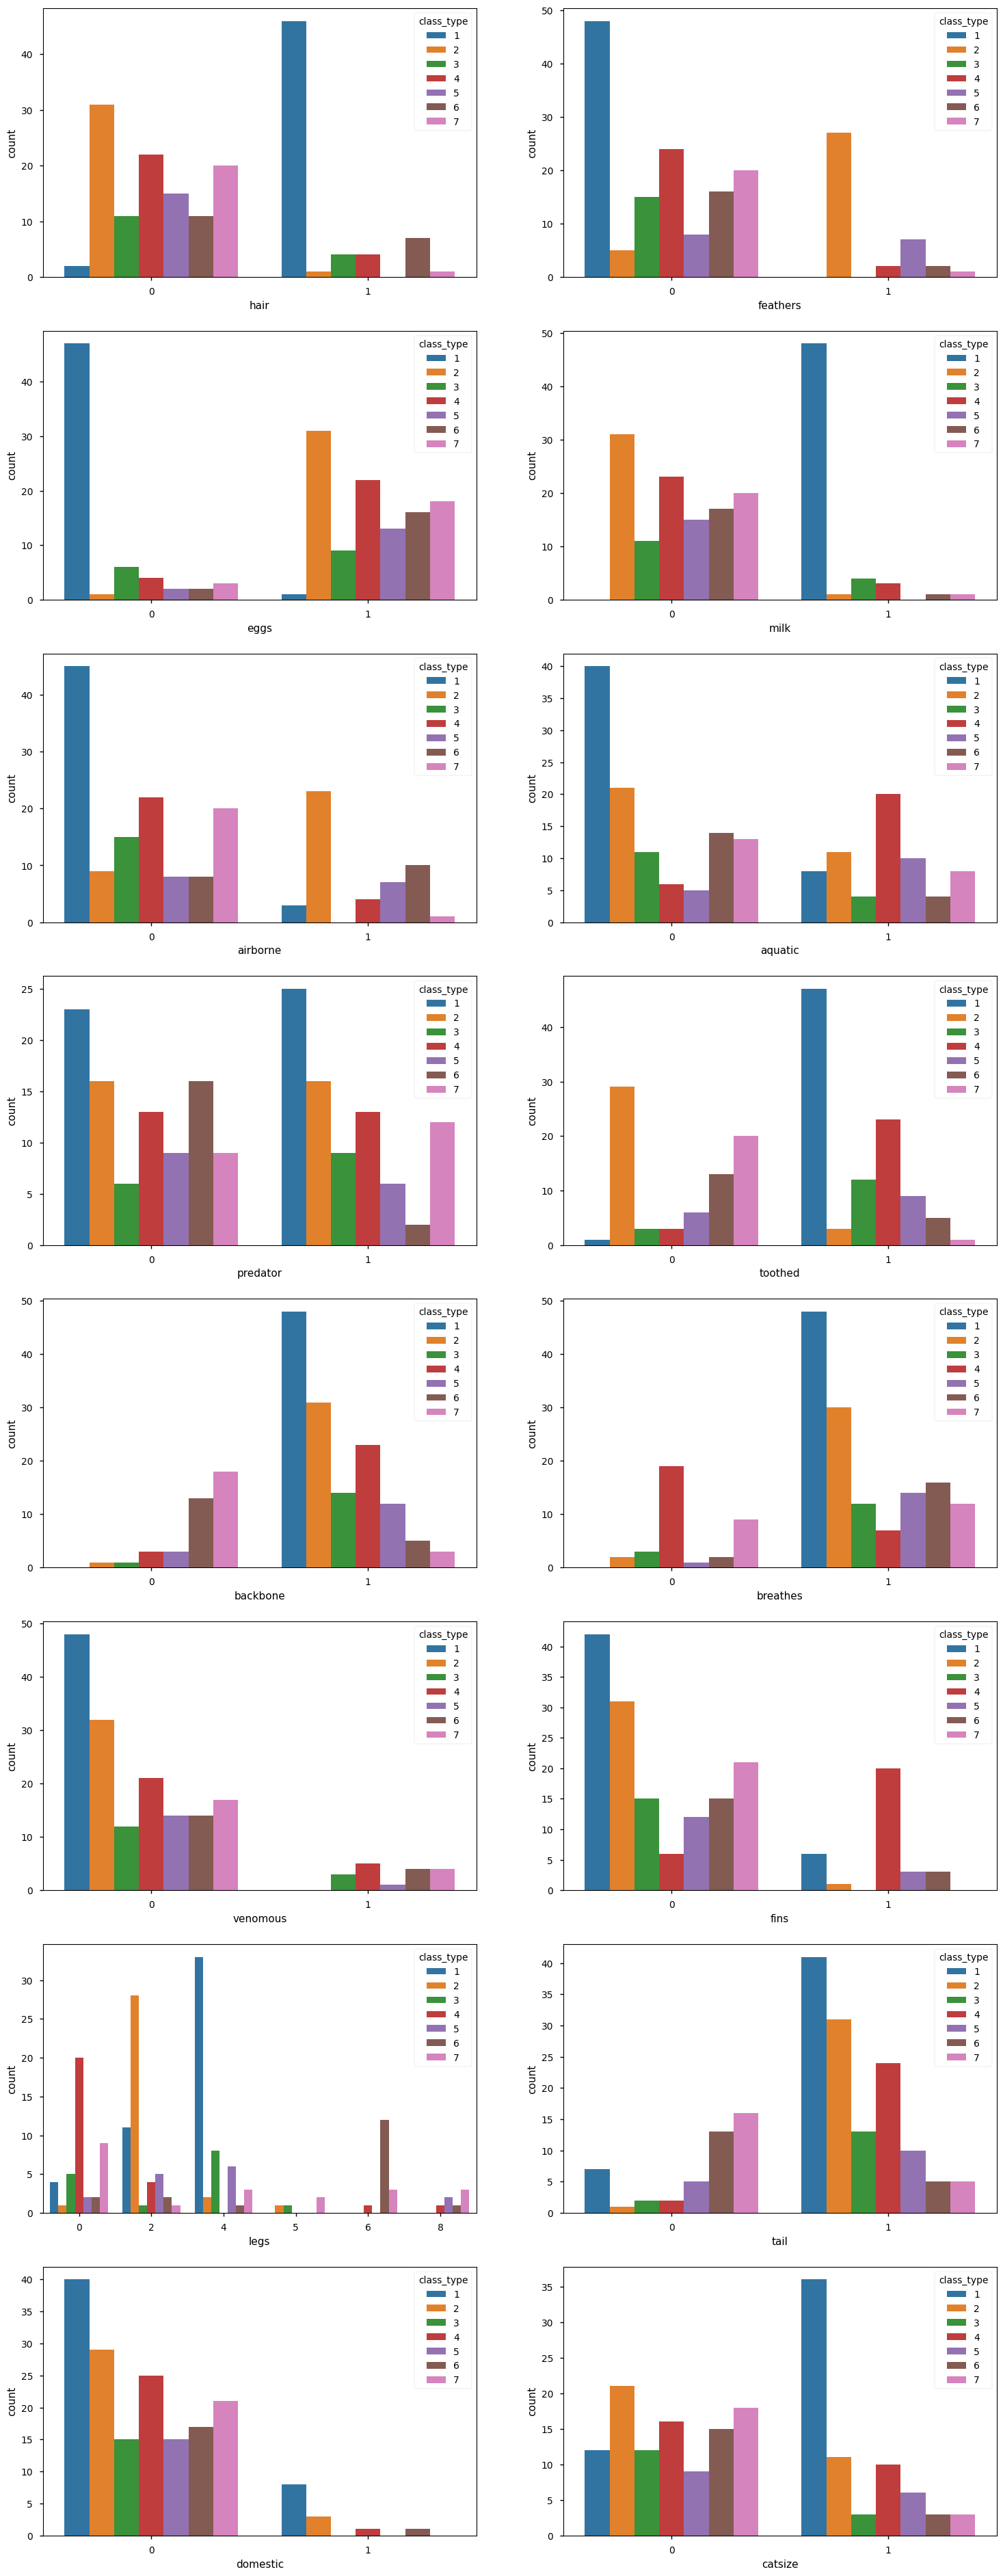

In [70]:

discrete_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
plt.style.use(plt.style.available[19])
num_discrete_features = len(discrete_features)
rows = (num_discrete_features + 1) // 2
cols = 2
plt.figure(figsize=(18, 6 * rows))
for i, feature in enumerate(discrete_features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=data[feature], hue=data['class_type'])
plt.show()

In [45]:
# Initialize SMOTE
smote = SMOTE(random_state=5)

# Apply SMOTE to generate synthetic samples
x_smote, y_smote = smote.fit_resample(feature, target)

# Display the class distribution after applying SMOTE
print('Class distribution after SMOTE:', Counter(y_smote))

Class distribution after SMOTE: Counter({1: 48, 4: 48, 2: 48, 7: 48, 6: 48, 5: 48, 3: 48})


In [46]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the features
x_normalized = pd.DataFrame(scaler.fit_transform(feature), columns=feature.columns)
print(x_normalized)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0     1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0   
1     1.0       0.0   0.0   1.0       0.0      0.0       0.0      1.0   
2     0.0       0.0   1.0   0.0       0.0      1.0       1.0      1.0   
3     1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0   
4     1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0   
..    ...       ...   ...   ...       ...      ...       ...      ...   
170   1.0       0.0   1.0   0.0       1.0      0.0       0.0      0.0   
171   1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0   
172   0.0       0.0   1.0   0.0       0.0      0.0       0.0      0.0   
173   0.0       1.0   1.0   0.0       1.0      0.0       0.0      0.0   
174   0.0       1.0   0.0   0.0       1.0      1.0       0.0      1.0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0         1.0       1.0       0.0   0.0  0.50   0.

Class distribution after SMOTE: Counter({1: 48, 4: 48, 2: 48, 7: 48, 6: 48, 5: 48, 3: 48})


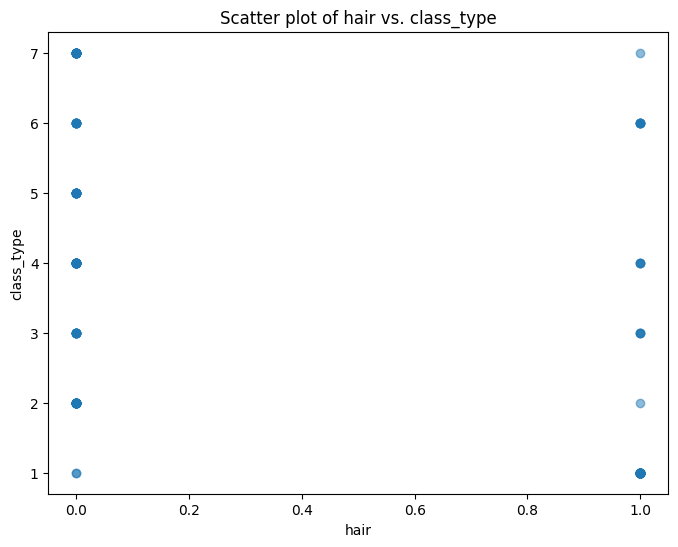

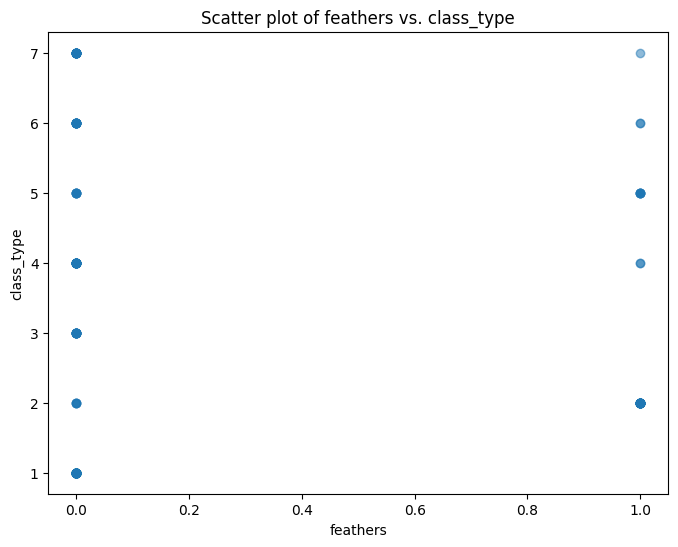

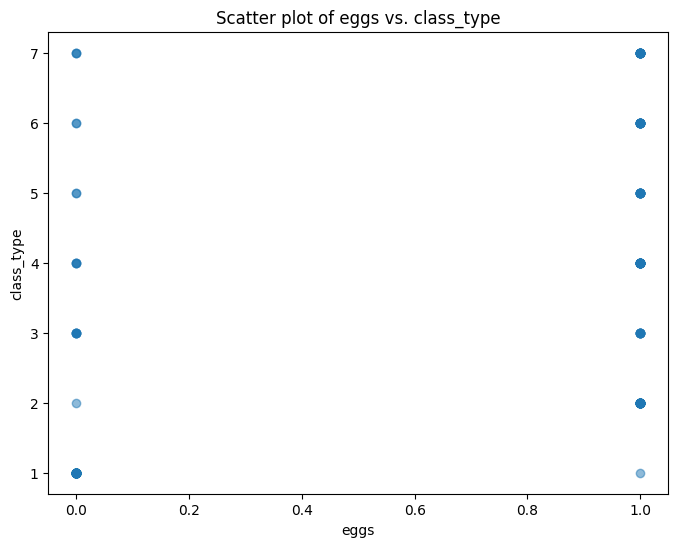

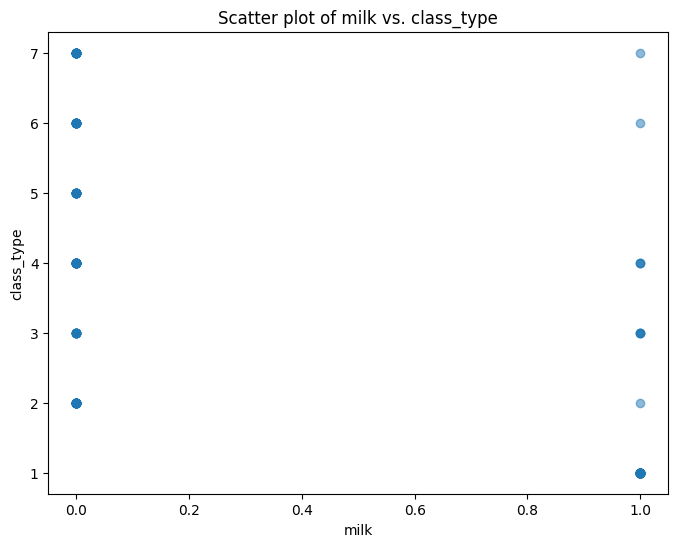

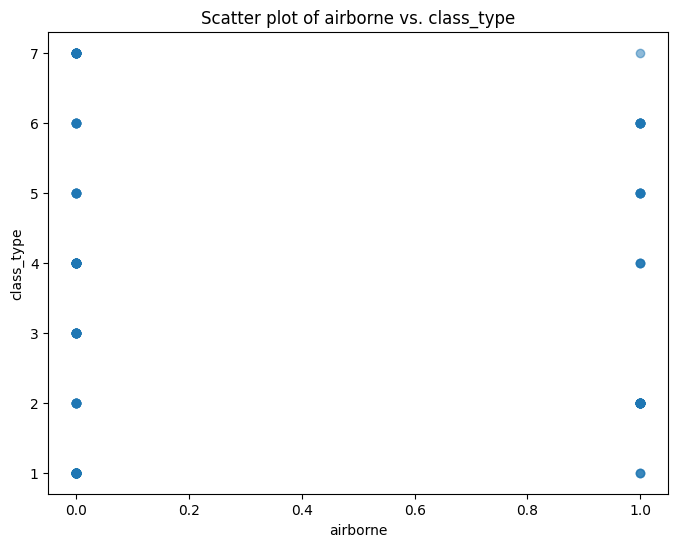

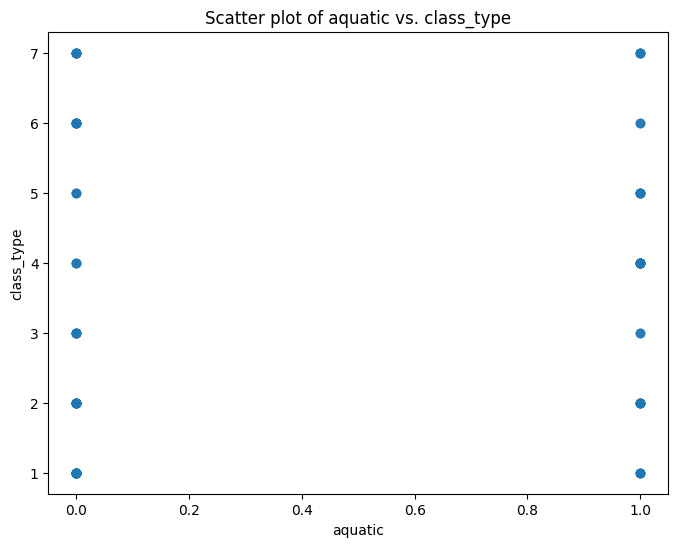

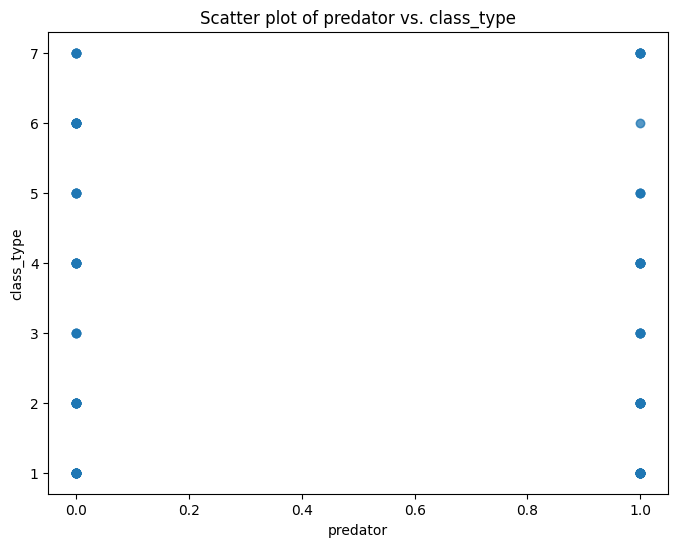

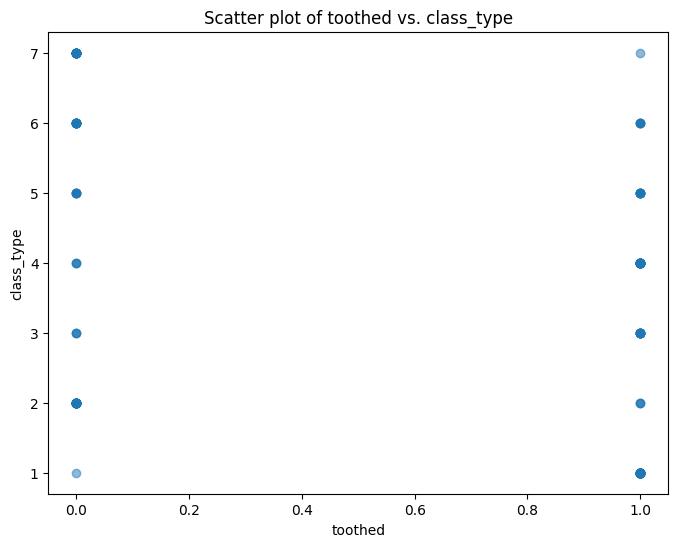

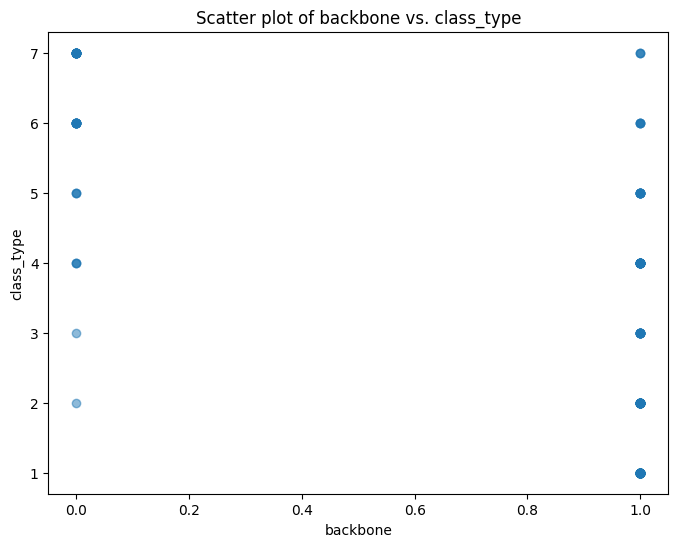

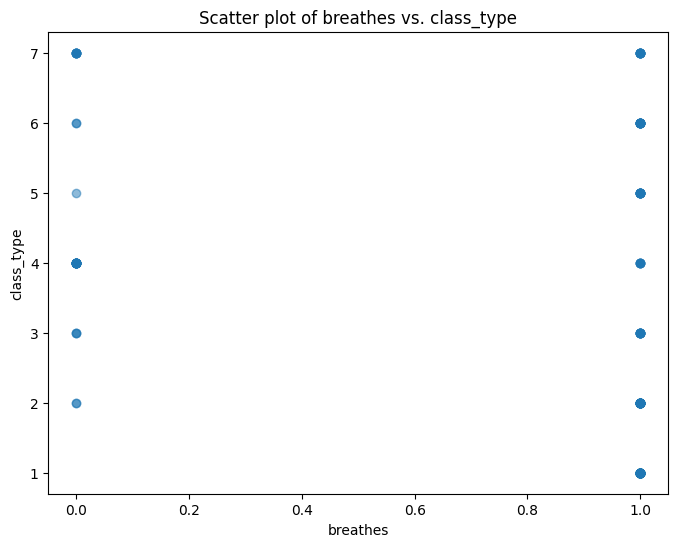

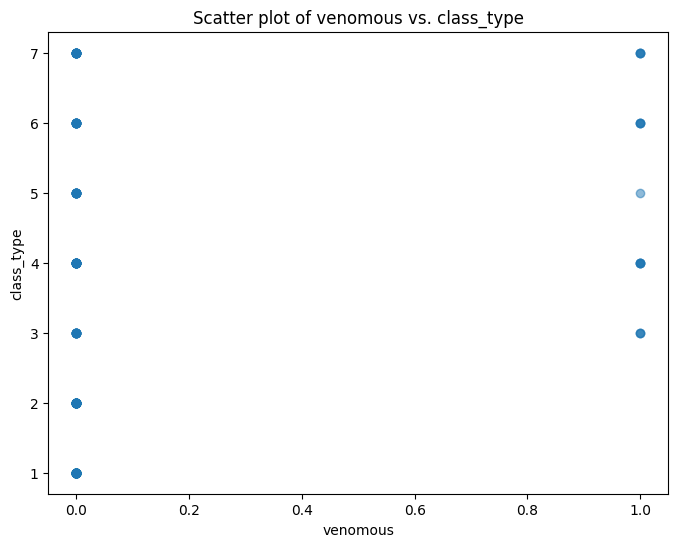

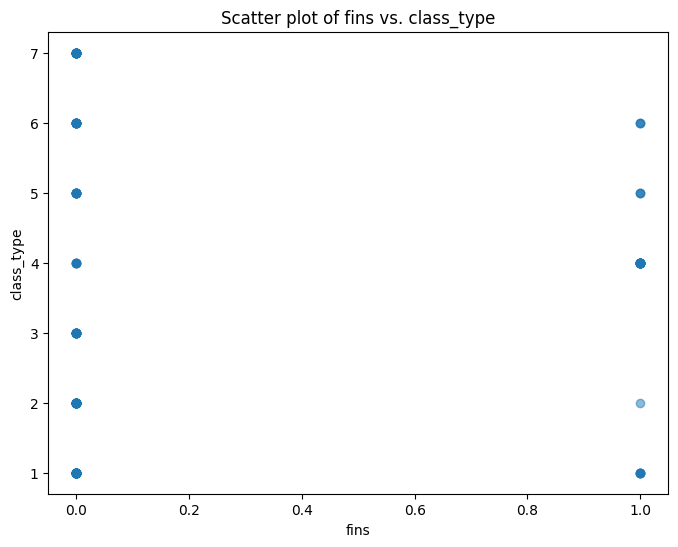

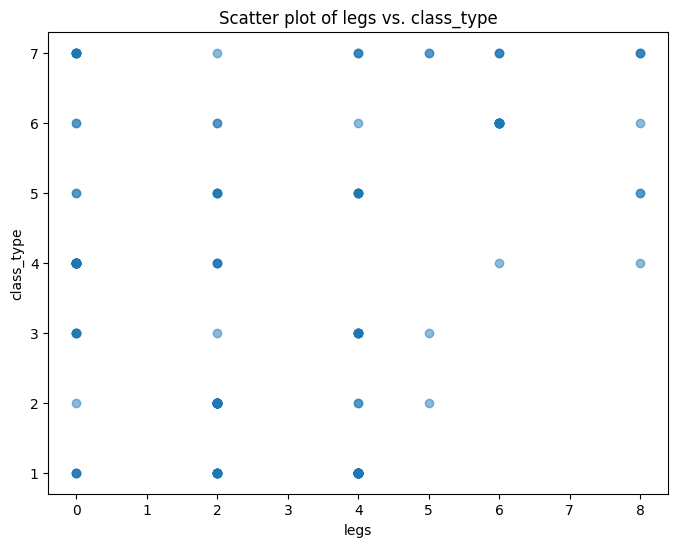

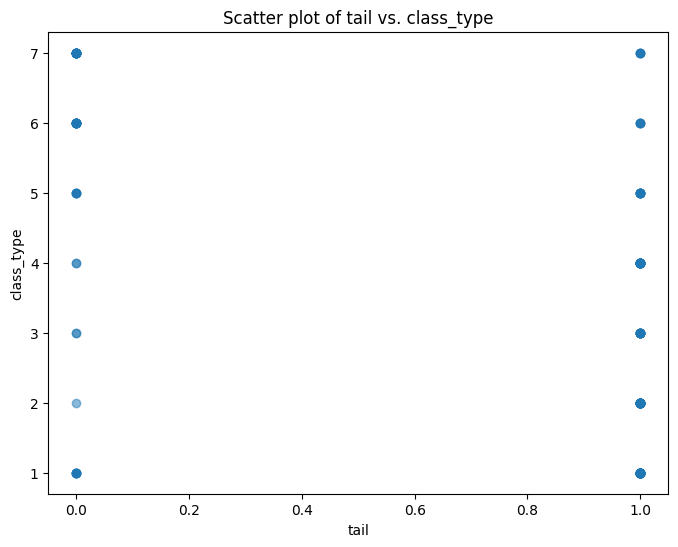

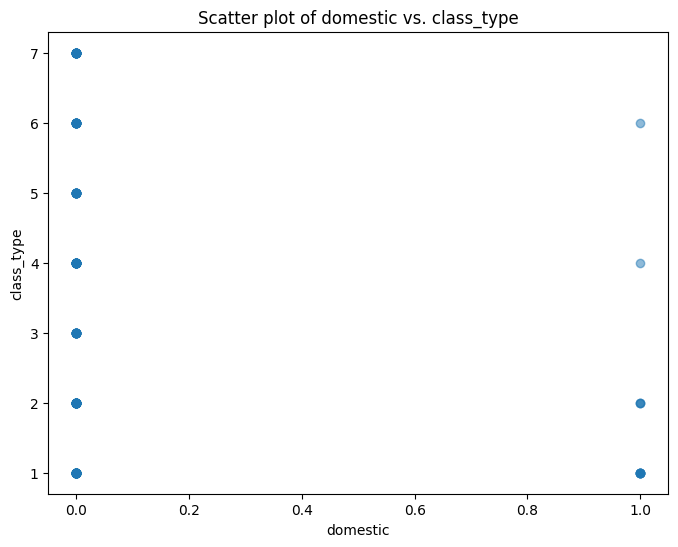

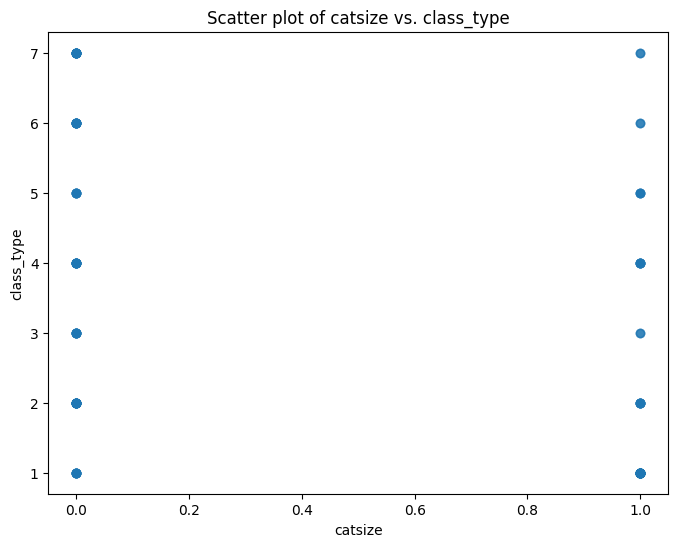

In [50]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
x_smote, y_smote = smote.fit_resample(x_normalized, target)

# Display the class distribution after applying SMOTE
print('Class distribution after SMOTE:', Counter(y_smote))

# Plot each feature against the target variable
for i in feature.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(feature[i], target, alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('class_type')
    plt.title(f'Scatter plot of {i} vs. class_type')
plt.show()

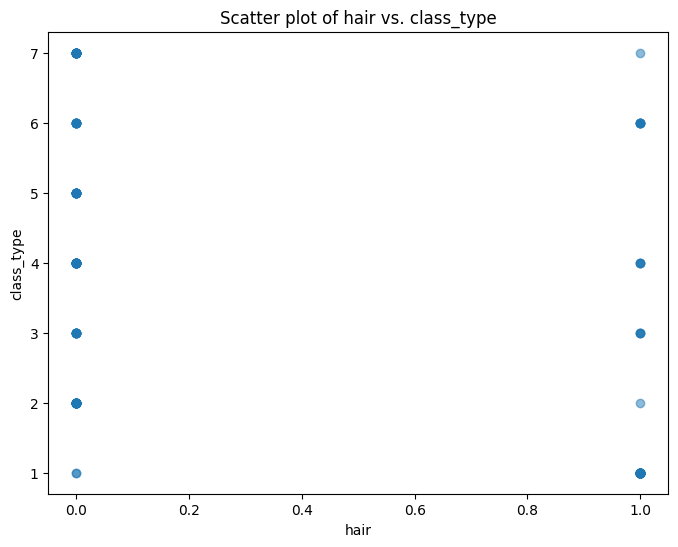

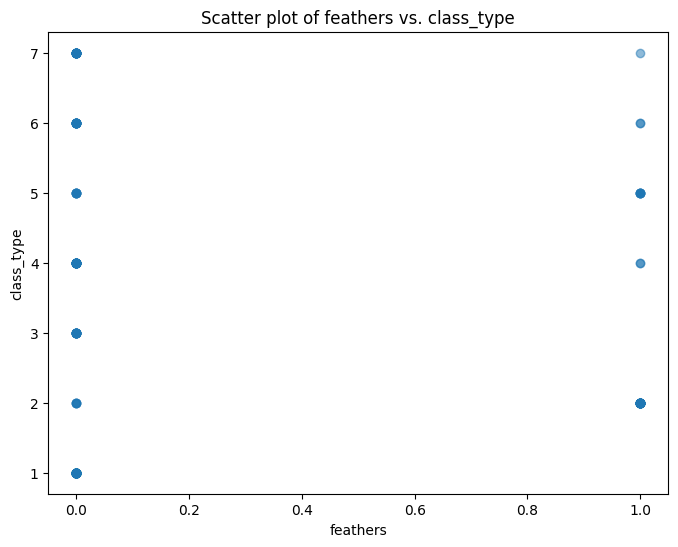

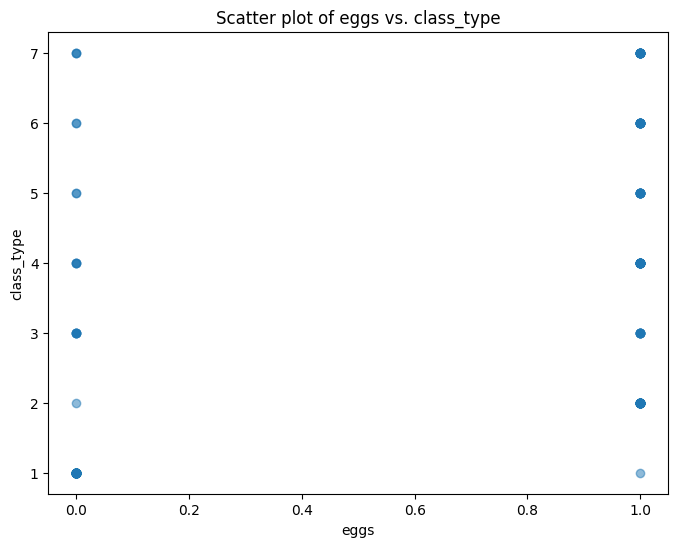

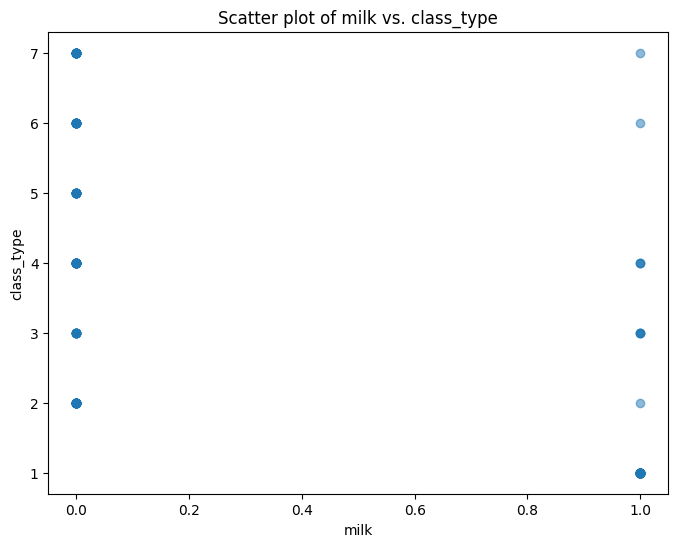

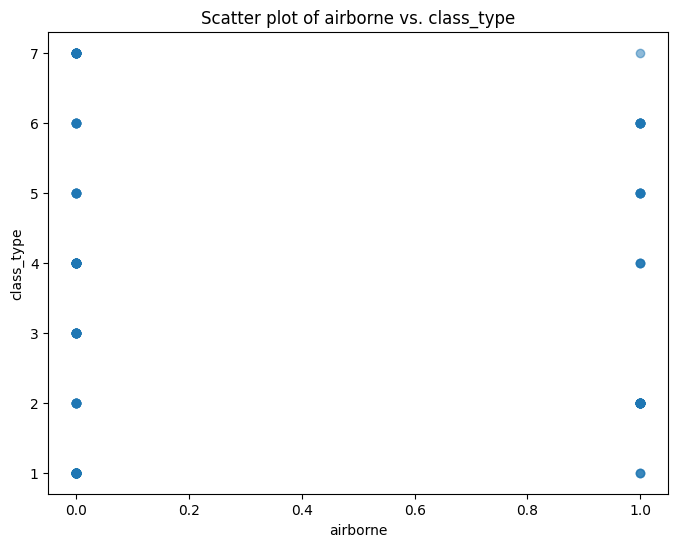

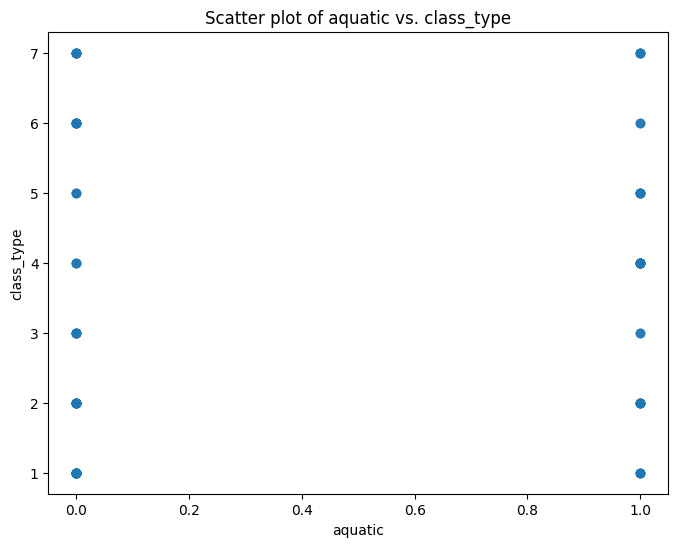

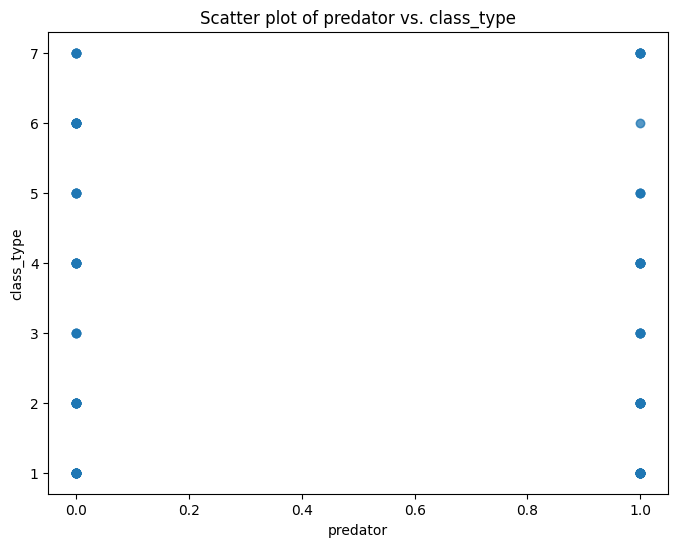

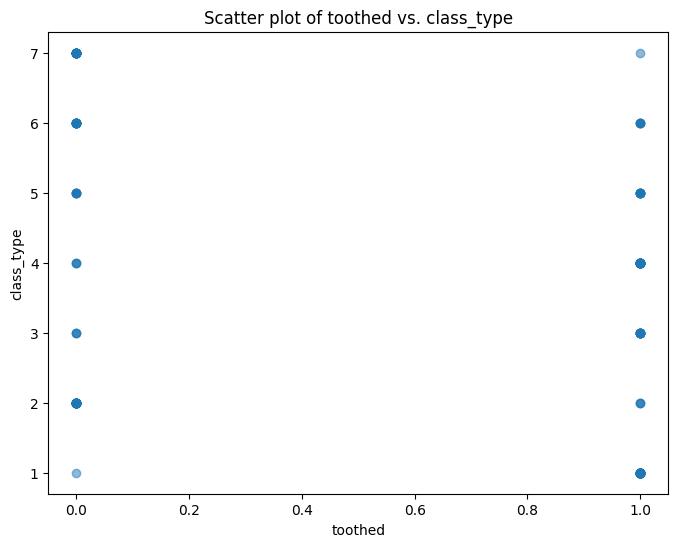

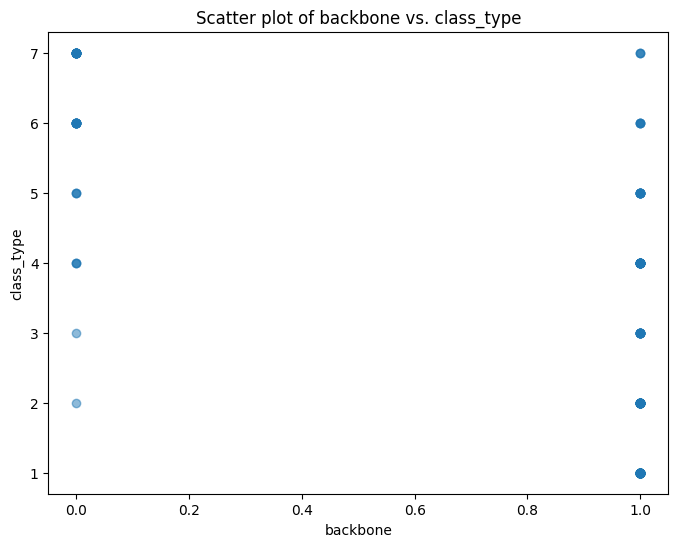

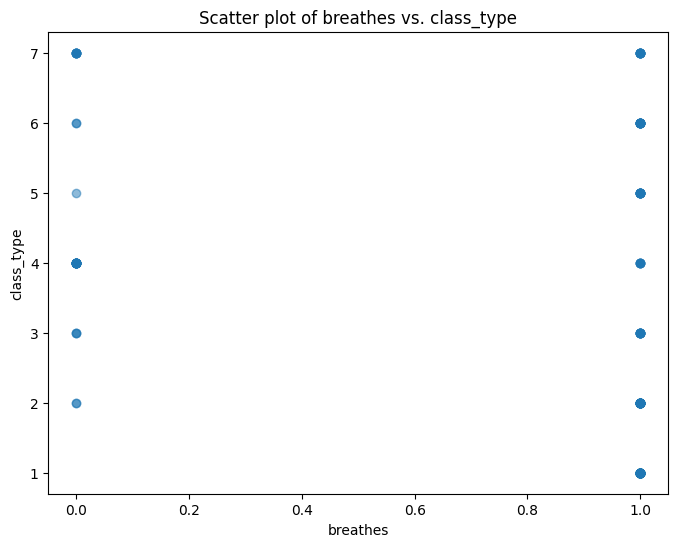

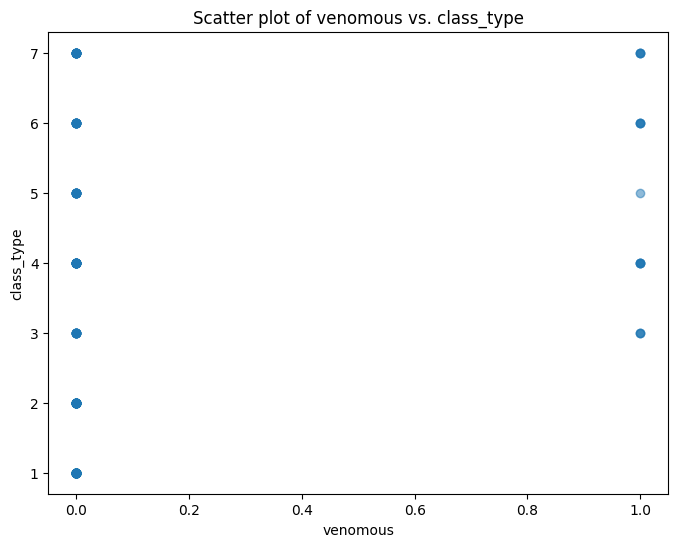

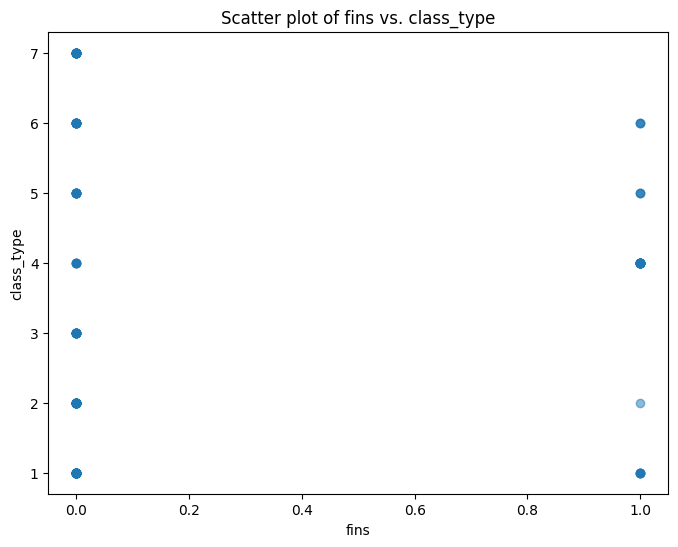

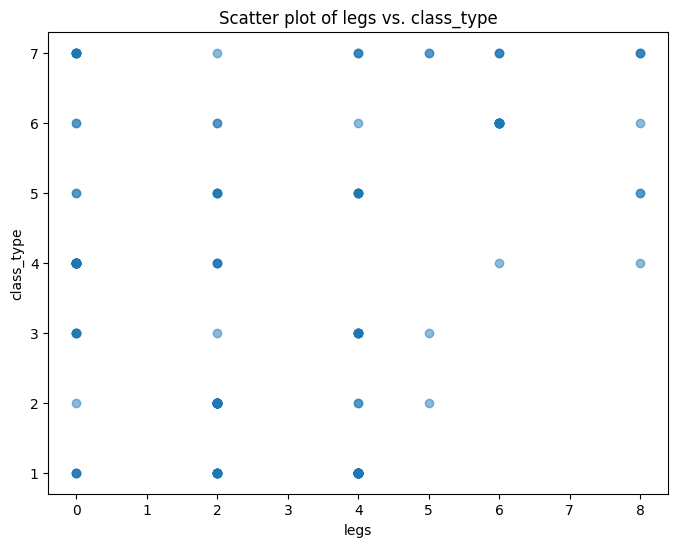

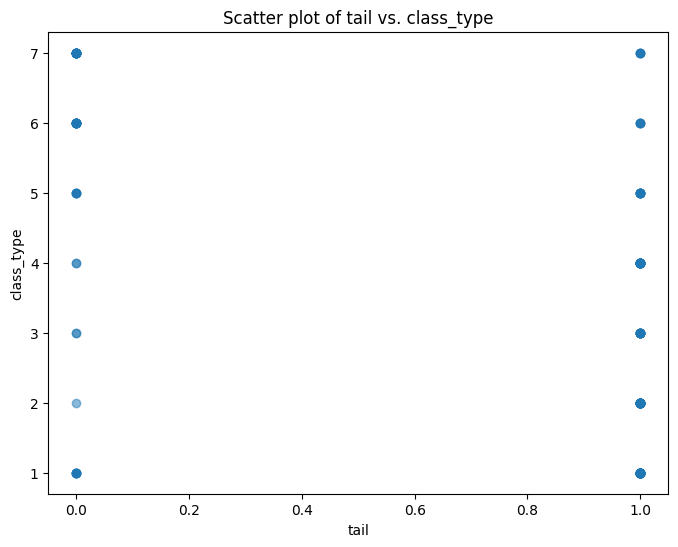

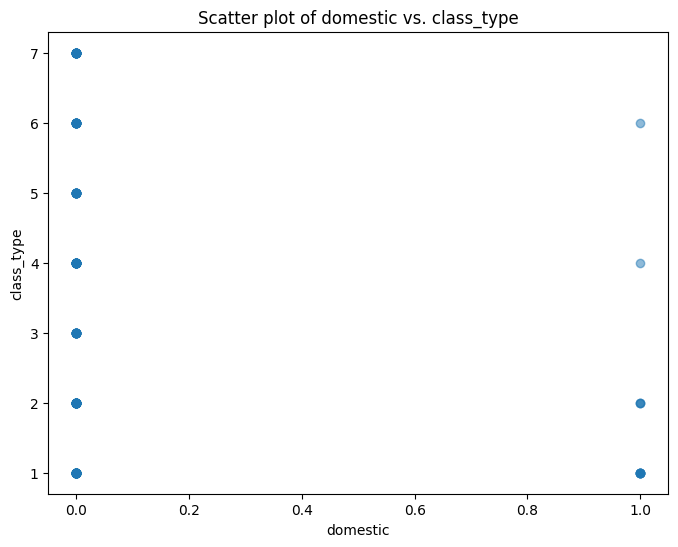

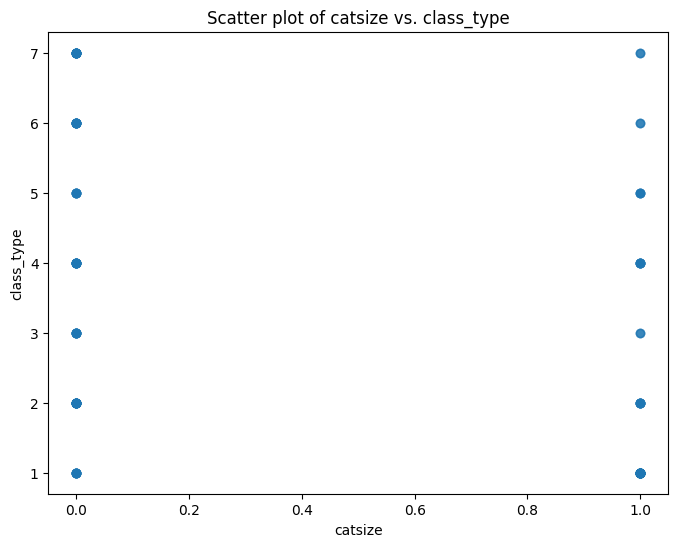

In [51]:

import matplotlib.pyplot as plt
for i in feature.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(feature[i], target, alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('class_type')
    plt.title(f'Scatter plot of {i} vs. class_type')
    plt.show()

In [52]:
# Separate normalized features and target
normalized_features = x_smote  # Renaming for clarity
target = y_smote

In [53]:
print(normalized_features)

     hair  feathers  eggs  milk  airborne   aquatic  predator  toothed  \
0     1.0       0.0   0.0   1.0       0.0  0.000000       1.0      1.0   
1     1.0       0.0   0.0   1.0       0.0  0.000000       0.0      1.0   
2     0.0       0.0   1.0   0.0       0.0  1.000000       1.0      1.0   
3     1.0       0.0   0.0   1.0       0.0  0.000000       1.0      1.0   
4     1.0       0.0   0.0   1.0       0.0  0.000000       1.0      1.0   
..    ...       ...   ...   ...       ...       ...       ...      ...   
331   0.0       0.0   1.0   0.0       0.0  0.000000       0.0      0.0   
332   0.0       0.0   1.0   0.0       0.0  0.241025       1.0      0.0   
333   0.0       0.0   1.0   0.0       0.0  0.000000       0.0      0.0   
334   0.0       0.0   1.0   0.0       0.0  1.000000       1.0      0.0   
335   0.0       0.0   1.0   0.0       0.0  1.000000       1.0      0.0   

     backbone  breathes  venomous  fins      legs  tail  domestic   catsize  
0         1.0       1.0  0.000000

In [54]:
print(target)

0      1
1      1
2      4
3      1
4      1
      ..
331    7
332    7
333    7
334    7
335    7
Name: class_type, Length: 336, dtype: int64


In [55]:
#training#####
#x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.7)
x_train, x_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=40)
print('Shape of x_train:', x_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (268, 16)
Shape of x_test: (68, 16)
Shape of y_train: (268,)
Shape of y_test: (68,)


<ipython-input-71-f8893d5e9820>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Accuracy (SVM): 0.6470588235294118
Confusion Matrix (SVM):
[[8 0 0 0 0 0 0]
 [0 8 1 0 0 0 0]
 [3 0 9 0 0 0 1]
 [0 1 0 9 0 0 1]
 [0 5 2 0 1 0 0]
 [0 1 0 1 1 3 6]
 [0 0 1 0 0 0 6]]


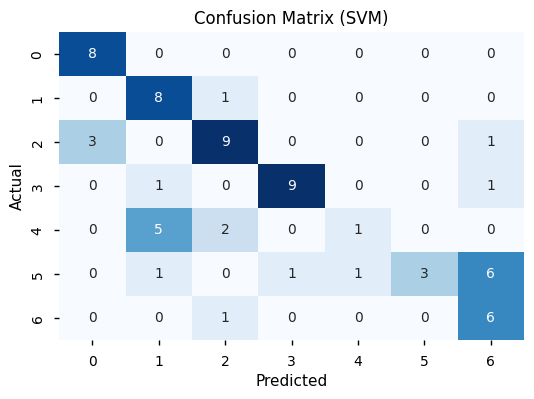

Mean Accuracy (Bootstrapped): 0.15
95% Confidence Interval: 0.01 - 0.31
Coefficient of Variation: 57.14%
Standard Deviation of Accuracy: 0.08
Mean Square Error: 0.01
The model is not consistent.


In [71]:
#svm and bootstrap
from sklearn.svm import SVC
'''svm_model=SVC(C=1.0)#regularisation
svm_model.fit(x_train,y_train)
from sklearn.svm import SVC'''

def svm_classification(data):
    # Fill missing values with mean
    data.fillna(data.mean(), inplace=True)

    # Check for NaNs in the target variable
    if data['class_type'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")

    # Separate features and target variable
    X = data.drop('class_type', axis=1)  # Assuming 'Outcome' is the target variable
    y = data['class_type']


    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=10)

    # Create and train the SVM model
    svm_model = SVC(kernel='linear', random_state=40)  # Using a linear kernel for simplicity
    svm_model.fit(x_train, y_train)

    # Predict on the test set
    y_pred_svm = svm_model.predict(x_test)

    # Calculate accuracy
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    print("Accuracy (SVM):", accuracy_svm)

    # Calculate confusion matrix
    cm_svm = confusion_matrix(y_test, y_pred_svm)

    # Print confusion matrix
    print("Confusion Matrix (SVM):")
    print(cm_svm)

    # Plot heatmap for confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (SVM)')
    plt.show()

# Assuming df is the DataFrame containing the dataset
svm_classification(data)
from sklearn import svm
svm_classifier=svm.SVC(kernel='linear', random_state=40)
num_bootstrap_samples = 150
accuracies = []
for _ in range(num_bootstrap_samples):
    sample_indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train
    y_bootstrap = y_train.values[sample_indices]
    svm_classifier.fit(x_bootstrap,y_bootstrap)
    y_pred_bootstrap=svm_classifier.predict(x_test)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    accuracies.append(accuracy_bootstrap)
mean_accuracy = np.mean(accuracies)
confidence_interval = np.percentile(accuracies, [2.5, 97.5])
print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
std_accuracy = np.std(accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
mse = np.mean((accuracies - mean_accuracy) ** 2)
print(f"Mean Square Error: {mse:.2f}")
if std_accuracy < 0.02 and coefficient_of_variation < 5:
    print("The model is consistent.")
else:
    print("The model is not consistent.")


0      4
1      4
2      0
3      4
4      4
      ..
170    6
171    4
172    0
173    2
174    8
Name: legs, Length: 175, dtype: int64
[[1. 4.]
 [1. 4.]
 [1. 0.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 0.]
 [1. 0.]
 [1. 4.]
 [1. 4.]
 [1. 2.]
 [1. 0.]
 [1. 0.]
 [1. 4.]
 [1. 6.]
 [1. 2.]
 [1. 4.]
 [1. 0.]
 [1. 0.]
 [1. 2.]
 [1. 2.]
 [1. 4.]
 [1. 2.]
 [1. 6.]
 [1. 4.]
 [1. 4.]
 [1. 2.]
 [1. 4.]
 [1. 2.]
 [1. 6.]
 [1. 4.]
 [1. 2.]
 [1. 2.]
 [1. 0.]
 [1. 4.]
 [1. 4.]
 [1. 2.]
 [1. 0.]
 [1. 6.]
 [1. 6.]
 [1. 2.]
 [1. 6.]
 [1. 2.]
 [1. 4.]
 [1. 4.]
 [1. 6.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 6.]
 [1. 4.]
 [1. 8.]
 [1. 4.]
 [1. 4.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 0.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 2.]
 [1. 8.]
 [1. 0.]
 [1. 0.]
 [1. 2.]
 [1. 0.]
 [1. 0.]
 [1. 2.]
 [1. 2.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 2.]
 [1. 2.]
 [1. 5.]
 [1. 0.]
 [1. 2.]
 [1. 6.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 0.]
 [1. 2.]
 [1. 4.]
 [1. 2.]

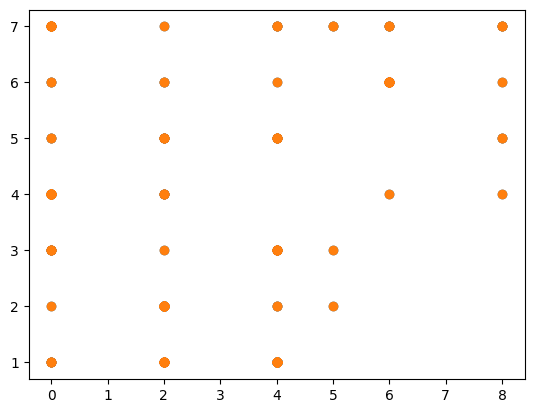

[3.07433243 0.1085898 ]

Predicted y values:
[3.50869165 3.50869165 3.07433243 3.50869165 3.50869165 3.50869165
 3.50869165 3.07433243 3.07433243 3.50869165 3.50869165 3.29151204
 3.07433243 3.07433243 3.50869165 3.72587126 3.29151204 3.50869165
 3.07433243 3.07433243 3.29151204 3.29151204 3.50869165 3.29151204
 3.72587126 3.50869165 3.50869165 3.29151204 3.50869165 3.29151204
 3.72587126 3.50869165 3.29151204 3.29151204 3.07433243 3.50869165
 3.50869165 3.29151204 3.07433243 3.72587126 3.72587126 3.29151204
 3.72587126 3.29151204 3.50869165 3.50869165 3.72587126 3.50869165
 3.50869165 3.50869165 3.50869165 3.72587126 3.50869165 3.94305087
 3.50869165 3.50869165 3.29151204 3.29151204 3.29151204 3.29151204
 3.07433243 3.07433243 3.07433243 3.50869165 3.50869165 3.50869165
 3.07433243 3.50869165 3.50869165 3.50869165 3.50869165 3.29151204
 3.94305087 3.07433243 3.07433243 3.29151204 3.07433243 3.07433243
 3.29151204 3.29151204 3.07433243 3.07433243 3.07433243 3.29151204
 3.29151204 3.617

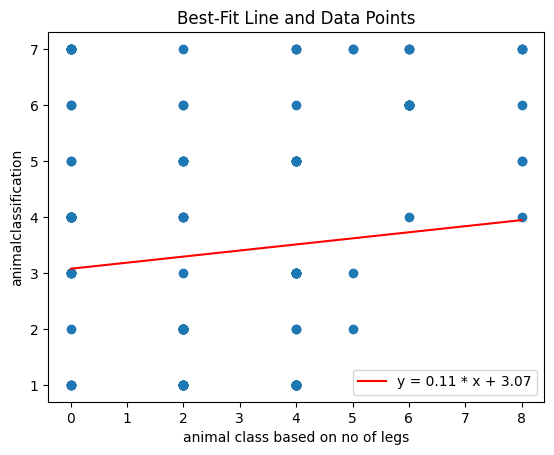

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
a = pd.read_csv('/content/zoo animal classification.csv')
x=a['legs']
y=a['class_type']
plt.scatter(x,y)
x_w = np.column_stack((np.ones(len(x)), x))
print(x)
print(x_w)
plt.scatter(x, y)
plt.show()
x_w_t = x_w.T
#print("\nTranspose of x with ones:")
#print(x_w_t)
x_w_tintoy = np.dot(x_w_t, y)
#print(x_w_tintoy)
x_wintox_w_t = np.dot(x_w_t, x_w)
#print(x_wintox_w_t)
x_wintox_w_t_inv = np.linalg.inv(x_wintox_w_t)
#print(x_wintox_w_t_inv)
weights = np.dot(x_wintox_w_t_inv, x_w_tintoy)
#print("\nweights=")
print(weights)
y_p = np.dot(x_w, weights)
print("\nPredicted y values:")
print(y_p)
intercept = weights[0]
slope = weights[1]
print("\nBest-fit line equation:")
print(f"y = {slope:.2f} * x + {intercept:.2f}")
line_eq = f"y = {slope:.2f} * x + {intercept:.2f}"
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', label=line_eq)
plt.legend()
plt.scatter(x,y)
plt.xlabel('animal class based on no of legs')
plt.ylabel('animalclassification')
plt.title('Best-Fit Line and Data Points')
plt.show()

[0.75, 0.7058823529411765, 0.6911764705882353, 0.7058823529411765, 0.7205882352941176, 0.7352941176470589, 0.7205882352941176, 0.7058823529411765, 0.7205882352941176, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.6911764705882353, 0.6911764705882353, 0.6911764705882353, 0.6911764705882353, 0.6911764705882353, 0.6911764705882353]


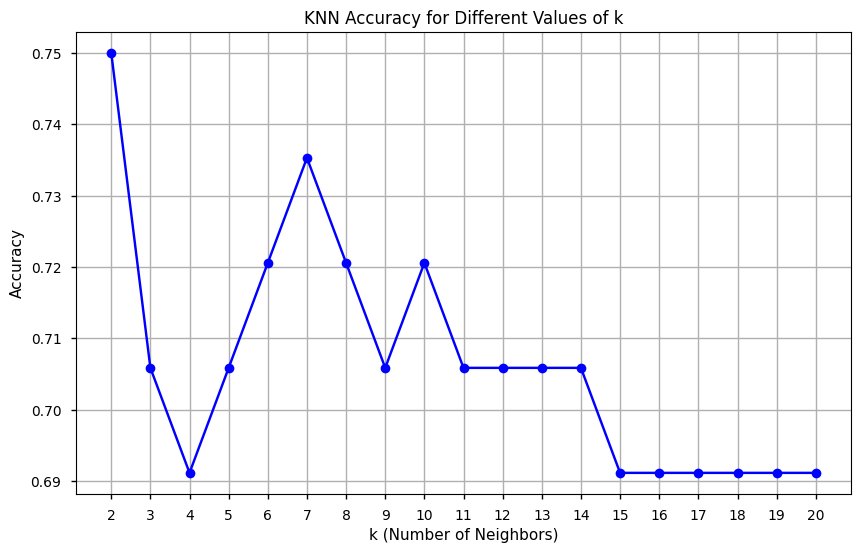

from K=15 we are getting good accuracy
The best k value is 2 with an accuracy of 0.75
Mean Accuracy (Bootstrapped): 0.04
95% Confidence Interval: 0.04 - 0.04
Coefficient of Variation: 0.00%
Standard Deviation of Accuracy: 0.00
Mean Square Error: 0.00
The model is consistent.
Confusion Matrix:
[[ 8  0  1  0  0  0  0]
 [ 0  8  0  1  2  0  1]
 [ 1  1  4  1  0  0  0]
 [ 1  0  2  5  1  0  0]
 [ 0  2  1  1  7  0  0]
 [ 1  0  0  2  0  5  0]
 [ 0  0  1  0  0  1 10]]


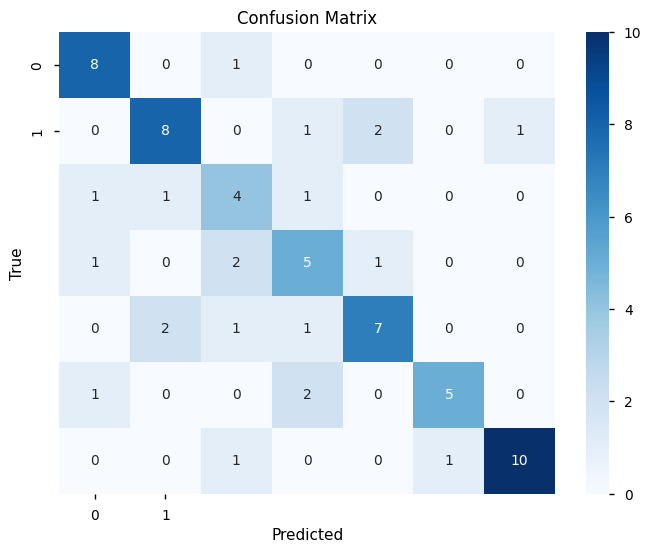

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=42)
k_values = list(range(2, 21))
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("from K=15 we are getting good accuracy")
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best k value is {best_k} with an accuracy of {max(accuracy_scores):.2f}")
num_bootstrap_samples = 100
accuracies = []

for _ in range(num_bootstrap_samples):
    bootstrap_indices = np.random.choice(x_train.shape[0], x_train.shape[0], replace=True)

    y_bootstrap = y_train.iloc[bootstrap_indices]
    knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
    knn.fit(x_bootstrap, y_bootstrap)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    accuracies.append(accuracy_bootstrap)
mean_accuracy = np.mean(accuracies)
confidence_interval = np.percentile(accuracies, [2.5, 97.5])
print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
std_accuracy = np.std(accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
mse = np.mean((accuracies - mean_accuracy) ** 2)
print(f"Mean Square Error: {mse:.2f}")
if std_accuracy < 0.02 and coefficient_of_variation < 5:
    print("The model is consistent.")
else:
    print("The model is not consistent.")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Explained Variance Ratio: [0.23769423 0.20035609]


<ipython-input-61-5471367b9da0>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


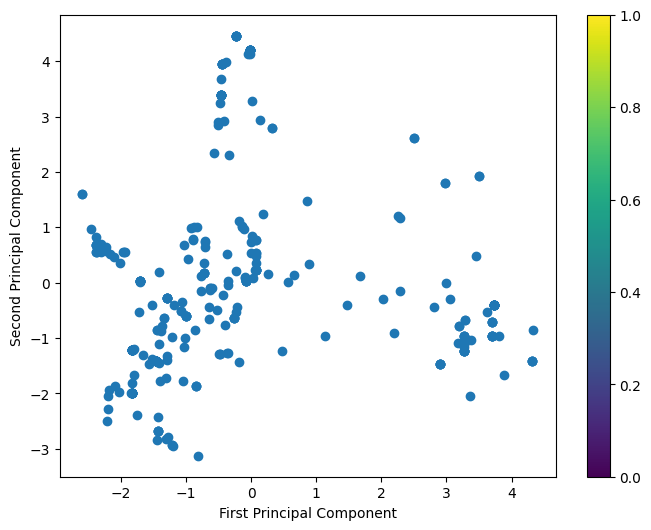

In [61]:
#pca
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(normalized_features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained Variance Ratio: {explained_variance_ratio}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()


AFTER PCA

<ipython-input-62-315507f17a6b>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Accuracy (SVM): 0.5
Confusion Matrix (SVM):
[[8 0 0 0 0 0 0]
 [0 4 0 1 0 1 1]
 [4 1 2 0 0 0 1]
 [1 1 1 5 0 2 0]
 [0 8 2 1 3 0 0]
 [1 1 0 1 0 6 0]
 [0 4 0 0 0 2 6]]


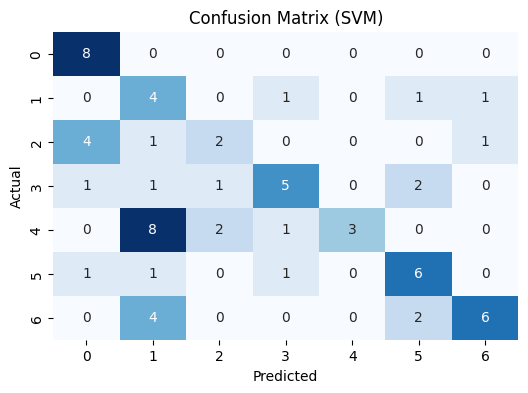

In [62]:
#svm
from sklearn.svm import SVC
def svm_classification(data):
    # Fill missing values with mean
    data.fillna(data.mean(), inplace=True)
    if data['class_type'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")

    # Separate features and target variable
    X = data.drop('class_type', axis=1)
    y = data['class_type']


    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=40)

    # Create and train the SVM model
    svm_model = SVC(kernel='linear', random_state=40)  # Using a linear kernel for simplicity
    svm_model.fit(x_train, y_train)

    # Predict on the test set
    y_pred_svm = svm_model.predict(x_test)

    # Calculate accuracy
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    print("Accuracy (SVM):", accuracy_svm)

    # Calculate confusion matrix
    cm_svm = confusion_matrix(y_test, y_pred_svm)

    # Print confusion matrix
    print("Confusion Matrix (SVM):")
    print(cm_svm)

    # Plot heatmap for confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (SVM)')
    plt.show()

# Assuming df is the DataFrame containing the dataset
svm_classification(data)



[0.6617647058823529, 0.6911764705882353, 0.6470588235294118, 0.6764705882352942, 0.6764705882352942, 0.6617647058823529, 0.6617647058823529, 0.6617647058823529, 0.6911764705882353, 0.6764705882352942, 0.6470588235294118, 0.6029411764705882, 0.6029411764705882, 0.6176470588235294, 0.6323529411764706, 0.6029411764705882, 0.6176470588235294, 0.6323529411764706, 0.6323529411764706]


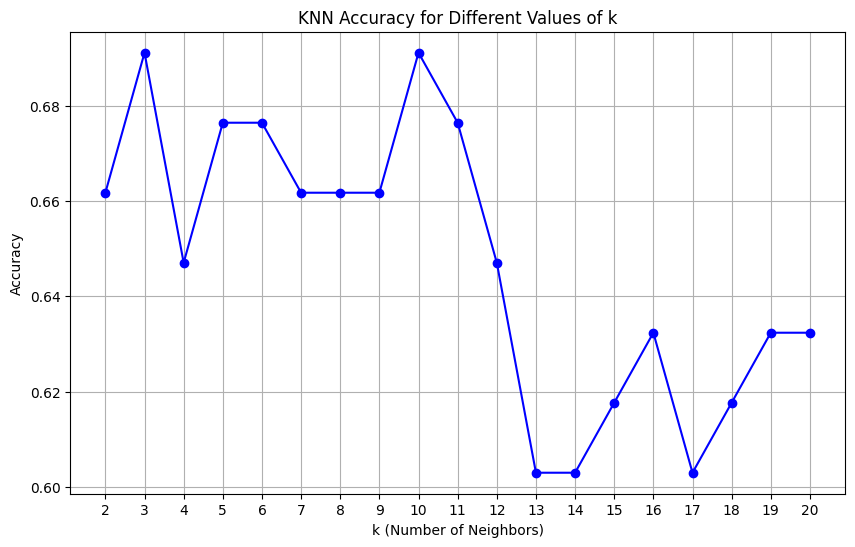

from K=19 we are getting good accuracy


In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)
k_values = list(range(2, 21))
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("from K=19 we are getting good accuracy")

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(feature)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_classifier = SVC(kernel='linear', random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(normalized_features,target, test_size=0.2, random_state=20)
print(X_train.shape,X_test.shape)
svm_classifier.fit(X_train, Y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:",accuracy)

(268, 16) (68, 16)
Accuracy: 0.7058823529411765
